Данный проект посвящён анализу **ономатопоэтической лексики** в переводах произведений А.П. Чехова на японский язык.

*Материал:* 28 рассказов, опубликованных на портале «Аодзора-бунко», в переводе Киёси Дзиндзая (24 рассказа), Миэкити Судзуки (2 рассказа) и Каё Сэнумы (2 рассказа).

**Ономатопоэтические единицы японского языка** — это слова, непосредственно передающие звуки живой и неживой природы, физические и эмоциональные ощущения, описывающие действия и состояния предметов.

Ономатопоэтические слова японского языка обычно делятся на две категории: *гионго* (звукоподражания) и *гитайго* (образоподражательные слова). Иногда используется и более детальная классификация.

Ономатопоэтические слова в японском языке чётко выделяются по своей структуре. У них есть основная часть (ядро), которая может быть короткой (из одного или двух слогов).

Ономатопоэтические слова могут:
- использоваться сами по себе;
- повторяться (редупликация), например: ピカピカ (pika-pika — блестеть);
- менять звучание при добавлении специальных окончаний, чтобы передать разные оттенки значения.

Перед началом работы с текстами необходимо создать список ономатопоэтической лексики, которую мы будем искать в переводах рассказов А. П. Чехова.

По ссылке (https://github.com/nanoskript/jp-onomatopoeia) можно найти github создателя инструмента поиска японских звукоподражаний и звуковых эффектов. Мы воспользовались ресурсами, на которые ссылается автор датасета:
- таблица Japanese Manga SFX с сайта The Jaded Network;
- txt-файл, включающий в себя *гионго* и *гитайго* с сайта http://nihongoresources.com.

**ЧАСТЬ 1**

1.1. Создаём csv-файл из таблицы Japanese Manga SFX.xlsx

Удаляем перевод на английский язык и описание звукоподражательных слов, оставляем только японский текст.

In [ ]:
import pandas as pd
import re
import csv

# 1. Читаем excel-файл и преобразовываем его в csv
file_path = r'C:\Users\Екатерина\VS Code Projects\Проект 1\Japanese_Manga_SFX.xlsx'

# В нашем файле два листа. Читаем оба и объединяем их в один датафрейм
# sheets теперь словарь, где ключи — это названия листов, а значения — df с их содержимым
sheets = pd.read_excel(file_path, sheet_name=None, engine='openpyxl')
combined_df = pd.concat(sheets.values(), ignore_index=True) #sheets.values() даёт список всех листов, ignore_index сбрасывает их индексы

csv_path = r'C:\Users\Екатерина\VS Code Projects\Проект 1\Japanese_Manga_SFX.csv'
combined_df.to_csv(csv_path, encoding='utf-8', index=False) # убираем номер строк (ненужный индекс)
# print(f"Файл csv сохранён в {csv_path}")

# 2. Читаем созданный csv-файл и извлекаем японские слова
with open(r'Japanese_Manga_SFX.csv', 'r', encoding='utf-8') as f:
    lines = f.readlines() # читаем построчно в список lines
# re.compile — создание шаблона для многократного использования
jp_pattern = re.compile(r'[\u3040-\u30FF\u4E00-\u9FFF]+') # регулярное выражение для поиска хираганы, катаканы, кандзи

jp_words = []
for line in lines:
    match = jp_pattern.search(line) # ищет первое японское слово в строке
    if match:
        jp_words.append(match.group())

# 3. Создаём новый csv только с японским текстом
with open('only_jp_Japanese_Manga_SFX.csv', 'w', encoding='utf-8') as f:
    for word in jp_words:
        f.write(word+'\n') # каждое слово в отдельной строке
    
# Читаем файл заново, но теперь пропускаем первые 12 строк (знаки японской азбуки) при помощи среза
with open(r'only_jp_Japanese_Manga_SFX.csv', 'r', encoding='utf-8') as f:
    lines = f.readlines()[12:]

# Перезаписываем файл без этих 12 строк
with open(r'only_jp_Japanese_Manga_SFX.csv', 'w', encoding='utf-8') as f:
    f.writelines(lines)

print(f"Первый csv-файл с {len(lines)} японскими ономатопоэтическими словами успешно создан.")

Первый csv-файл с 576 японскими ономатопоэтическими словами успешно создан.


1.2. Теперь открываем txt-файл с ономатопоэтической лексикой. Конвертируем в csv, оставляем только японский текст и объединяем его с первым файлом.

In [ ]:
# 1. Уточняем путь к txt-файлу и создаём пустой список для найденных японских слов
file_path = r'C:\Users\Екатерина\VS Code Projects\Проект 1\giongo.txt'

jp_words = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        matches = jp_pattern.findall(line) # построчно читаем японские слова
        if matches:
            jp_words.extend(matches) # extend добавляеn все элементы из списка

# 2. Записываем найденные слова в csv-файл
with open(r'giongo.csv', 'w', encoding='utf-8') as f:
    for word in jp_words:
        f.write(word+'\n')
print(f"Второй csv-файл с {len(jp_words)} ономатопоэтическими словами успешно создан.")

# 3. Объединяем два csv-файла
giongo_path = r'C:\Users\Екатерина\VS Code Projects\Проект 1\giongo.csv'
Japanese_Manga_SFX_path = r'C:\Users\Екатерина\VS Code Projects\Проект 1\only_jp_Japanese_Manga_SFX.csv'

giongo_df = pd.read_csv(giongo_path, header=None, encoding='utf-8')
Japanese_Manga_SFX_df = pd.read_csv(Japanese_Manga_SFX_path, header=None, encoding='utf-8')
combined_df = pd.concat([giongo_df, Japanese_Manga_SFX_df], ignore_index=True)

# 4. Удаляем дубликаты и подсчитываем количество слов, сохраняем
count_with_duplicates = len(combined_df)
combined_no_duplicates = combined_df.drop_duplicates()
count_without_duplicates = len(combined_no_duplicates)

combined_no_duplicates_path = r'C:\Users\Екатерина\VS Code Projects\Проект 1\combined_no_duplicates.csv'
combined_no_duplicates.to_csv(combined_no_duplicates_path, index=False, header=None, encoding='utf-8')

print(f"\nОбъединённый файл успешно создан.")
print(f"После удаления дублей — {count_without_duplicates} ономатопов, до удаления — {count_with_duplicates} ономатопов.")

Второй csv-файл с 6148 ономатопоэтическими словами успешно создан.

Объединённый файл успешно создан.
После удаления дублей — 3598 ономатопов, до удаления — 6724 ономатопов.


In [35]:
# (Дополнительно) Можно удалить созданные файлы, которые уже не понадобятся
import os

folder_path = r"C:\Users\Екатерина\VS Code Projects\Проект 1"

# Список файлов для удаления
files_to_delete = [
    "giongo.csv",
    "Japanese_Manga_SFX.csv",
    "only_jp_Japanese_Manga_SFX.csv"
]

for file_name in files_to_delete:
    f_path = os.path.join(folder_path, file_name)
    if os.path.exists(f_path):
        os.remove(f_path)
        print(f"Файл {file_name} успешно удалён.")
    else:
        print(f"Файл {file_name} не найден.")

Файл giongo.csv успешно удалён.
Файл Japanese_Manga_SFX.csv успешно удалён.
Файл only_jp_Japanese_Manga_SFX.csv успешно удалён.


1.3. Загрузка и подготовка csv-файла к работе.

In [36]:
# import pandas as pd

csv_file = 'combined_no_duplicates.csv'
df = pd.read_csv(csv_file, header=None) # читаем csv-файл без заголовков
onomatopoeia_list = df[0].tolist() # преобразовываем данные в список
print(onomatopoeia_list[:100])  # первые 100 слов для проверки

['あ', 'ア', 'あー', 'アー', 'あーあー', 'アーアー', 'あーっ', 'アーッ', 'あっ', 'あーん', 'アーン', 'あーんあーん', 'アーンアーン', 'あぎあぎ', 'アギアギ', 'あぐあぐ', 'アグアグ', 'あくせく', 'アクセク', 'あたふた', 'アタフタ', 'あちゃ', 'アチャ', 'アッ', 'あっけらかん', 'アッケラカン', 'あっさり', 'アッサリ', 'あっちゃ', 'アッチャ', 'あっちゃー', 'アッチャー', 'あっははは', 'アッハハハ', 'あっぷあっぷ', 'アップアップ', 'あっはーん', 'アッハーン', 'あらよっ', 'アラヨッ', 'ありあり', 'アリアリ', 'あんぐり', 'アングリ', 'いえい', 'イエイ', 'いえーい', 'イエーイ', 'いざこざ', 'イザコザ', 'いじいじ', 'イジイジ', 'いそいそ', 'イソイソ', 'いちゃいちゃ', 'イチャイチャ', 'いちゃくらいちゃくら', 'イチャクライチャクラ', 'いらいら', 'イライラ', 'うー', 'ウー', 'うーっ', 'ウーッ', 'うぉーん', 'ウォーン', 'うかうか', 'ウカウカ', 'うきうき', 'ウキウキ', 'うごごご', 'ウゴゴゴ', 'うじうじ', 'ウジウジ', 'うじゃうじゃ', 'ウジャウジャ', 'うす', 'ウス', 'うずうず', 'ウズウズ', 'うぞうぞ', 'ウゾウゾ', 'うちゅ', 'ウチュ', 'うっ', 'ウッ', 'うっかり', 'ウッカリ', 'うっくん', 'ウックン', 'うっさら', 'ウッサラ', 'うっすら', 'ウッスラ', 'うっすり', 'ウッスリ', 'うっとり', 'ウットリ', 'うつら', 'ウツラ']


**ЧАСТЬ 2**

Теперь, когда у нас есть список из 3598 ономатопоэтических слов, пора переходить к парсингу.

Проверим его работу на рассказе «Ионыч»:

In [37]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.aozora.gr.jp/cards/001155/files/43647_29259.html'
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser') # получаем html-код всей страницы, создаём объект soup для удобного разбора html
    main_text = soup.find('div', class_='main_text') # <div> с классом main_text
    if main_text:
        text = main_text.get_text(separator=" ", strip=True).replace(" ", "")
        # separator заменяет html-теги на пробелы
        # strip удаляет лишние пробелы в начале и конце текста
        print(text[:100])
    else:
        print("Текст не найден.")
else:
    print(f"Ошибка: {response.status_code}")


一県庁のあるＳ市へやって来た人が、どうも退屈だとか単調だとかいってこぼすと、土地の人たちはまるで言いわけでもするような調子で、いやいやＳはとてもいいところだ、Ｓには図書館から劇場、それからクラブまで一


Отлично, код работает, однако ссылки .html, ведущие непосредственно на тексты, нужно ещё добыть из карточек произведений.

P.S. Изначально карточек и текстов 28, но перевод «Палаты №6» повторяется дважды (разные издания). Мы исключим старое издание из анализа.

2.1. Выведем на экран ссылки всех карточек:



In [38]:
# 1. Определяем базовую страницу и общую часть для всех карточек
base_url = 'https://www.aozora.gr.jp/'
relative_path = '../cards/'

# 2. Загружаем страницу с произведениями А. П. Чехова
page_url = 'https://www.aozora.gr.jp/index_pages/person1155.html'
response = requests.get(page_url)
soup = BeautifulSoup(response.content, 'html.parser')
links = soup.find_all('a', href=True) # ищем все ссылки <a href="..."> на странице
all_card_urls = [] # пока пустой список ссылок на карточки произведений

# 3. Формируем полные ссылки карточек
for link in links:
    href = link['href'] # извлекаем URL
    if href.startswith(relative_path):
        full_card_url = base_url + href.replace('../', '') # формируем полную ссылку вручную
        all_card_urls.append(full_card_url) # добавляем ссылку в список

print(f"Количество найденных карточек произведений: {len(all_card_urls)}")
for full_card_url in all_card_urls[:5]:
    print(full_card_url)
print("И так далее…")

Количество найденных карточек произведений: 28
https://www.aozora.gr.jp/cards/001155/card43647.html
https://www.aozora.gr.jp/cards/001155/card43644.html
https://www.aozora.gr.jp/cards/001155/card51292.html
https://www.aozora.gr.jp/cards/001155/card51366.html
https://www.aozora.gr.jp/cards/001155/card51860.html
И так далее…


2.2. Достаём ссылки на текст произведений из всех найденных нами карточек:

In [39]:
import time # импортируем модуль time для задержки между запросами

full_story_urls = [] # список ссылок, ведущих на текст произведений

# Перебираем карточки и находим ссылки на полные тексты
for full_card_url in all_card_urls:
    # print(f"Обрабатываю карточку: {full_card_url}…")
    response = requests.get(full_card_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    link_tag = soup.find('a', href=True, string='いますぐXHTML版で読む')
    if link_tag:
        relative_link = link_tag['href'] # относительный путь без домена
        full_story_url = base_url + '/cards/001155/' + relative_link.lstrip('./') # убираем ./ в начале ссылки
        full_story_urls.append(full_story_url)
    else:
        print("Ссылка на произведение не найдена.")

    time.sleep(1) # пауза 1 секунда

print(f"Количество найденных ссылок: {len(full_story_urls)}")
for full_story_url in full_story_urls[:5]:
    print(f"Полная ссылка на произведение: {full_story_url}")
print("И так далее…")

Количество найденных ссылок: 28
Полная ссылка на произведение: https://www.aozora.gr.jp//cards/001155/files/43647_29259.html
Полная ссылка на произведение: https://www.aozora.gr.jp//cards/001155/files/43644_29257.html
Полная ссылка на произведение: https://www.aozora.gr.jp//cards/001155/files/51292_39397.html
Полная ссылка на произведение: https://www.aozora.gr.jp//cards/001155/files/51366_39697.html
Полная ссылка на произведение: https://www.aozora.gr.jp//cards/001155/files/51860_41507.html
И так далее…


2.3. Извлекаем тексты произведений по каждой ссылке и сохраняем их в txt-файлы с названием рассказа:

In [ ]:
import os
# import re # для очистки заголовков от недопустимых символов

# 1. Указываем путь для сохранения произведений А. П. Чехова
save_directory = r'C:\Users\Екатерина\VS Code Projects\Проект 1\Тексты А. П. Чехова'

# Проверяем, существует ли папка и создаём, если её нет
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# 2. Т.к. в выдаче должно быть не больше пяти произведений, добавим счётчик
count = 0
max_display = 5

# 3. Парсинг HTML
for full_story_url in full_story_urls:
    response = requests.get(full_story_url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        # Достаём заголовок
        title_tag = soup.find('h1', class_='title')
        if title_tag:
            title = title_tag.get_text(strip=True) # strip убирает лишние пробелы
            safe_title = re.sub(r'[\\/*?:"<>|]', "", title)

            main_text = soup.find('div', class_='main_text')
            if main_text:
                text = main_text.get_text(separator="　", strip=True).replace("　", "") # уберём японские большие пробелы
                
                if text.startswith('一') or text.startswith('――'):
                    text = text.lstrip('一――')  # уберём символы, если они есть

                if count < max_display:
                    print(f"Название произведения: {safe_title}")
                    print(text[:50])
                
                elif count == max_display:
                    print("И так далее…")

                # Сохраняем txt, названный по имени рассказа
                file_path = os.path.join(save_directory, f"{safe_title}.txt")
                with open(file_path, 'w', encoding='utf-8') as f:
                    f.write(text)

                count += 1
            else:
                    print("Текст не найден.")
        else:
            print("Заголовок не найден.")
    else:
        print(f"Ошибка: {response.status_code}") 
    
    time.sleep(1)

Название произведения: イオーヌィチ
県庁のあるＳ市へやって来た人が、どうも退屈だとか単調だとかいってこぼすと、土地の人たちはまるで言いわ
Название произведения: 犬を連れた奥さん
海岸通りに新しい顔が現われたという噂であった――犬を連れた奥さんが。ドミートリイ・ドミートリチ・グー
Название произведения: かき
小雨もよいの、ある秋の夕暮れだった。（ぼくは、あのときのことをはっきりおぼえている。）ぼくは、父につ
Название произведения: カシタンカ
行儀がわるいまるできつねみたいな顔つきをした一匹の若い赤犬が――この犬は、足の短い猟犬と番犬とのあい
Название произведения: かもめ
人物アルカージナ（イリーナ・ニコラーエヴナ）とつぎ先の姓はトレープレヴァ、女優トレープレフ（コンスタ
И так далее…


**ЧАСТЬ 3**

3.1. Пришло время токенизации текстов. В нашем проекте мы воспользуемся токенизатором Janome (это Python-библиотека для обработки японского текста, основанная на инструменте для морфологического анализа MeCab).

Janome включает встроенный словарь и поддерживает частеречную разметку.

Для каждого слова Janome предоставляет следующие данные:
- Лексема
- Часть речи (POS)
- Чтение слова
- Дополнительная информация (спряжение, форма, наклонение и т.д.)

Поддерживает все три типа японской письменности: кандзи и азбуки (хирагана, катакана).

Благодаря встроенной POS-разметке можно легко избавиться от знаков препинания (記号) и стоп-слов:
- частицы (助詞): の, と, が, を, は и т.д.
- вспомогательные глаголы (助動詞): ます, である и т.д.
- союзы (接続詞): そして, それで и т.д.
непредикативные, или приимённые, прилагательные  (連体詞): この, その и т.д.


Однако поскольку ономатопоэтические слова выступают в роли наречий (ADV, 副詞), глаголов (VERB, 動詞) и прилагательных (ADJ, 形容詞), мы сосредоточимся только на тех частях речи, которые необходимы для нашего анализа.
Также добавим к списку существительные (名詞), т.к. N-ADJ выполняют функцию прилагательного, но с грамматикой, свойственной именам существительным.

In [53]:
from janome.tokenizer import Tokenizer
import os

# Наречия, глаголы, прилагательные, существительные
valid_pos_tags = ['副詞', '動詞', '形容詞', '名詞']

directory_path = r'C:\Users\Екатерина\VS Code Projects\Проект 1\Тексты А. П. Чехова'

# Словарь, где ключ — название файла, значение — список слов с частями речи
words_with_pos_by_text = {}
# Словарь для хранения общего количества токенов (без знаков препинания)
total_tokens_by_text = {}

# Т.к. в выдаче должно быть не больше пяти произведений, добавим счётчик
count = 0
max_display = 5

def tokenize_and_filter(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()  # читаем текст в переменную text
            tokenizer = Tokenizer()
            tokens = tokenizer.tokenize(text)

            filtered_tokens = []
            all_tokens_count = 0

            for token in tokens:
                base_form = token.base_form  # начальная форма слова
                part_of_speech = token.part_of_speech.split(',')[0]  # часть речи
                additional_info = token.part_of_speech.split(',')  # грамматическая информация через запятую

                # Исключаем знаки препинания
                if not token.part_of_speech.startswith('記号'):
                    all_tokens_count += 1
                
                # Проверяем, чтобы слово не было пустым, принадлежало к valid_pos_tags и исключаем знаки препинания
                if base_form.strip() and part_of_speech in valid_pos_tags and not token.part_of_speech.startswith('記号'):
                    if '非自立' not in additional_info:  # исключаем зависимые слова
                        filtered_tokens.append(f'{base_form} ({part_of_speech})')

            return filtered_tokens, all_tokens_count

    except Exception as e:
        print(f"Ошибка при обработке файла {file_path}: {e}")
        return [], 0

for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)

    # Токенизируем текст и сохраняем результат
    filtered_tokens, all_tokens_count = tokenize_and_filter(file_path)
    words_with_pos_by_text[filename] = filtered_tokens  # сохраняем результат с ключом filename
    total_tokens_by_text[filename] = all_tokens_count  # сохраняем общее количество токенов (без знаков препинания)

    if count < max_display:
        print(f"Название произведения {filename}:")
        print(filtered_tokens[:5])  # первые 5 токенов
        print(f"Всего токенов (без знаков препинания): {all_tokens_count}")
    
    elif count == max_display:
        print("И так далее…")

    count += 1

Название произведения かき.txt:
['小雨 (名詞)', '秋 (名詞)', '夕暮れ (名詞)', 'ぼく (名詞)', 'はっきり (副詞)']
Всего токенов (без знаков препинания): 2082
Название произведения かもめ.txt:
['人物 (名詞)', 'アルカージナ (名詞)', 'イリーナ・ニコラーエヴナ (名詞)', 'つぎ (名詞)', '先 (名詞)']
Всего токенов (без знаков препинания): 24798
Название произведения てがみ.txt:
['ユウコフ (名詞)', '年 (名詞)', 'まだ (副詞)', 'やつ (名詞)', '九つ (名詞)']
Всего токенов (без знаков препинания): 1963
Название произведения ねむい.txt:
['夜ふけ (名詞)', '十 (名詞)', '三 (名詞)', 'なる (動詞)', '子守り (名詞)']
Всего токенов (без знаков препинания): 2895
Название произведения イオーヌィチ.txt:
['県庁 (名詞)', 'ある (動詞)', '市 (名詞)', 'やって来る (動詞)', '人 (名詞)']
Всего токенов (без знаков препинания): 11301
И так далее…


 3.2. Подключаем созданный нами список ономатопоэтической лексики (**onomatopoeia_list**) и ищем перечисленные единицы в переводах текстов А.П. Чехова.

 Выбор слов длиннее двух слогов обусловлен желанием повысить точность анализа и уменьшить количество ложноположительных результатов (в частности, из-за омонимии глагол する появляется больше 5000 раз). Длинные слова (три слога и более) с большей вероятностью представляют собой ономатопоэтические единицы.

In [ ]:
# Инициализация счетчика
count = 0
max_display = 5
stoplist = ["ちゃん", "ありゃ", "そりゃ", "キュー", "ぐるり", "どっか"]

def find_onomatopoeia_words(filtered_tokens, onomatopoeia_list):
    onomatopoeia_words = []  # пустой список для найденных слов
    
    for token in filtered_tokens:
        word = token.split(" (")[0]  # отделяем слово от части речи

        if word in onomatopoeia_list and word not in stoplist:
            if len(word) >= 3:
                onomatopoeia_words.append(token)
    
    return onomatopoeia_words

# Словарь для хранения ономатопоэтических слов по каждому рассказу
onomatopoeia_words_by_text = {}

# Обрабатываем все файлы
for filename, filtered_tokens in words_with_pos_by_text.items():
    onomatopoeia_words = find_onomatopoeia_words(filtered_tokens, onomatopoeia_list)
    onomatopoeia_words_by_text[filename] = onomatopoeia_words

# Выводим только первые 5 рассказов
for i, (filename, onomatopoeia_words) in enumerate(onomatopoeia_words_by_text.items()):
    if onomatopoeia_words:
        print(f"В рассказе {filename} найдено {len(onomatopoeia_words)} ономатопоэтических слов:")
        print(", ".join(onomatopoeia_words)[:60])  # первые 60 символов
    else:
        print(f"В рассказе {filename} не найдено ономатопоэтических слов.")
    
    if i + 1 >= max_display:
        print("И так далее...")
        break

# Переменная для общего количества ономатопов
total_onomatopoeia_words = 0

# Подсчитываем общее количество ономатопов во всех рассказах
for filename, onomatopoeia_words in onomatopoeia_words_by_text.items():
    total_onomatopoeia_words += len(onomatopoeia_words)

print(f"Всего найдено {total_onomatopoeia_words} ономатопоэтических слов.")

В рассказе かき.txt найдено 29 ономатопоэтических слов:
はっきり (副詞), がくがく (副詞), ぐったり (副詞), だぶだぶ (名詞), ぼろぼろ (名詞), ちょうど 
В рассказе かもめ.txt найдено 119 ономатопоэтических слов:
てくてく (副詞), ごろごろ (副詞), ザーッ (副詞), てっきり (副詞), べったり (副詞), きっかり (
В рассказе てがみ.txt найдено 3 ономатопоэтических слов:
ぼんやり (副詞), ありあり (副詞), みしみし (副詞)
В рассказе ねむい.txt найдено 38 ономатопоэтических слов:
ころり (名詞), むんむん (副詞), ずきずき (副詞), かさかさ (名詞), ころり (名詞), ぶつぶつ (副
В рассказе イオーヌィチ.txt найдено 79 ономатопоэтических слов:
ちょいちょい (副詞), でっぷり (副詞), どっさり (副詞), さっぱり (副詞), ぷんぷん (副詞), ほやほ
И так далее...
Всего найдено 1495 ономатопоэтических слов.


3.3. Почему бы не подсчитать долю ономатопоэтических слов в каждом рассказе и в целом?

**Гистограмма №1.** Доля ономатопоэтических слов в каждом произведении среди valid_pos_tags

В произведении かき.txt ономатопы составляют 2.91% от valid_pos токенов.
В произведении かもめ.txt ономатопы составляют 1.00% от valid_pos токенов.
В произведении てがみ.txt ономатопы составляют 0.34% от valid_pos токенов.
В произведении ねむい.txt ономатопы составляют 2.66% от valid_pos токенов.
В произведении イオーヌィチ.txt ономатопы составляют 1.54% от valid_pos токенов.
И так далее…
Средний процент ономатопов по всем произведениям: 0.95%


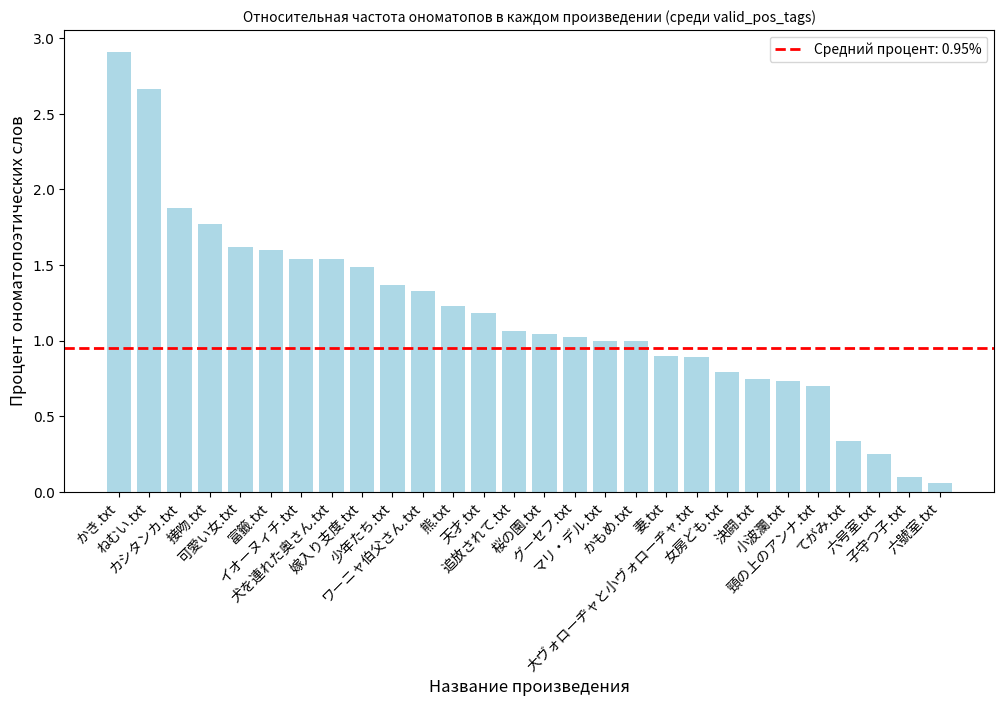

In [54]:
import matplotlib.pyplot as plt # для построения графиков
import matplotlib.font_manager as fm # для японского шрифта

total_tokens = 0 # во всех рассказах
total_onomatopoeia_words = 0 # во всех рассказах
onomatopoeia_percentage_by_text = {} # словарь для хранения % для каждого рассказа

# Проходимся по каждому рассказу
for filename, filtered_tokens in words_with_pos_by_text.items():
    total_tokens_in_text = len(filtered_tokens)
    onomatopoeia_words = onomatopoeia_words_by_text.get(filename, []) # если ономатопов нет, []
    total_onomatopoeia_words_in_text = len(onomatopoeia_words)

    # Вычисляем процент
    if total_tokens_in_text > 0:
        percentage = (total_onomatopoeia_words_in_text / total_tokens_in_text) * 100
    else:
        percentage = 0
    
    # Сохраняем процент для данного произведения
    onomatopoeia_percentage_by_text[filename] = percentage

    # Обновляем счётчик для всех рассказов
    total_tokens += total_tokens_in_text
    total_onomatopoeia_words += total_onomatopoeia_words_in_text

# Можно вывести проценты для каждого произведения
for i, (filename, percentage) in enumerate(onomatopoeia_percentage_by_text.items()):
    if i == 5:
        break
    print(f"В произведении {filename} ономатопы составляют {percentage:.2f}% от valid_pos токенов.")
print("И так далее…")

# Подсчёт общего процента ономатопов
if total_tokens > 0:
    total_percentage = (total_onomatopoeia_words / total_tokens) * 100
else:
    total_percentage = 0
print(f"Средний процент ономатопов по всем произведениям: {total_percentage:.2f}%")

# Сортируем тексты по убыванию процента ономатопов
sorted_onomatopoeia = sorted(onomatopoeia_percentage_by_text.items(), key=lambda x: x[1], reverse=True)

# Разделяем названия и значения
sorted_filenames = [x[0] for x in sorted_onomatopoeia]
sorted_percentages = [x[1] for x in sorted_onomatopoeia]

# Шрифт для японского текста
font_path = r'C:\Users\Екатерина\VS Code Projects\Проект 1\NotoSansCJKjp-Regular.otf'
prop = fm.FontProperties(fname=font_path)

plt.figure(figsize=(12, 6)) # ширина 12, высота 6
plt.bar(sorted_filenames, sorted_percentages, color="lightblue")
# Подписываем оси
plt.xlabel("Название произведения", fontsize=12, fontproperties=prop)
plt.ylabel("Процент ономатопоэтических слов", fontsize=12, fontproperties=prop)
plt.title("Относительная частота ономатопов в каждом произведении (среди valid_pos_tags)", fontsize=14, fontproperties=prop)
plt.xticks(rotation=45, ha='right', fontproperties=prop) # поворот подписей на 45 градусов, выровнены по правому краю
# Добавляем средний процент в виде пунктирной линии
plt.axhline(y=total_percentage, color='red', linestyle='--', linewidth=2, label=f"Средний процент: {total_percentage:.2f}%")
plt.legend(prop=prop)
plt.show()


**Гистограмма № 2.** Абсолютная частота ономатопов в переводах произведений А. П. Чехова.

Рейтинг произведений по количеству ономатопов:
1. 決闘.txt: 193 ономатопа(-ов)
2. ワーニャ伯父さん.txt: 155 ономатопа(-ов)
3. 桜の園.txt: 125 ономатопа(-ов)
4. かもめ.txt: 119 ономатопа(-ов)
5. 妻.txt: 106 ономатопа(-ов)
6. 接吻.txt: 103 ономатопа(-ов)
7. カシタンカ.txt: 95 ономатопа(-ов)
8. イオーヌィチ.txt: 79 ономатопа(-ов)
9. 犬を連れた奥さん.txt: 73 ономатопа(-ов)
10. 可愛い女.txt: 61 ономатопа(-ов)
11. 熊.txt: 41 ономатопа(-ов)
12. ねむい.txt: 38 ономатопа(-ов)
13. グーセフ.txt: 33 ономатопа(-ов)
14. 六号室.txt: 32 ономатопа(-ов)
15. かき.txt: 29 ономатопа(-ов)
16. 女房ども.txt: 27 ономатопа(-ов)
17. 大ヴォローヂャと小ヴォローヂャ.txt: 26 ономатопа(-ов)
18. 頸の上のアンナ.txt: 26 ономатопа(-ов)
19. 追放されて.txt: 25 ономатопа(-ов)
20. 富籤.txt: 21 ономатопа(-ов)
21. 少年たち.txt: 21 ономатопа(-ов)
22. 嫁入り支度.txt: 20 ономатопа(-ов)
23. マリ・デル.txt: 13 ономатопа(-ов)
24. 天才.txt: 12 ономатопа(-ов)
25. 六號室.txt: 9 ономатопа(-ов)
26. 小波瀾.txt: 9 ономатопа(-ов)
27. てがみ.txt: 3 ономатопа(-ов)
28. 子守つ子.txt: 1 ономатопа(-ов)


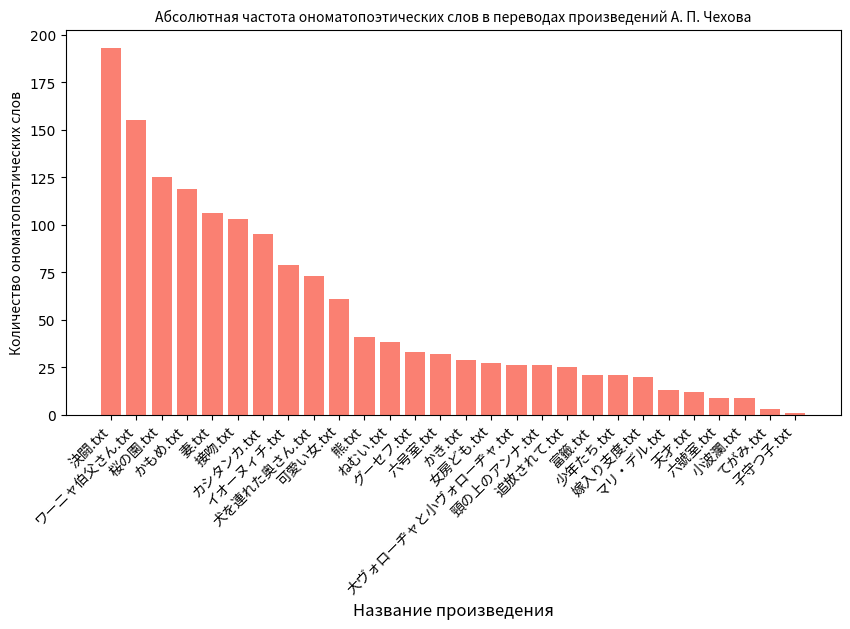

In [55]:
# Создаём словарь, где ключ — название произведения, значение — количество ономатопов
# Значения берём из словаря onomatopoeia_words_by_text
onomatopoeia_count_by_text = {filename:len(words) for filename, words in onomatopoeia_words_by_text.items()}
# word_count_by_text.items() создаёт список кортежей [(название_1, кол-во_слов_1)], ф-ция сортирует по кол-ву слов
sorted_onomatopoeia_count = sorted(onomatopoeia_count_by_text.items(), key=lambda x: x[1], reverse=True)

print("Рейтинг произведений по количеству ономатопов:")
# enumerate(..., start=1) нумерует произведения с 1, присваивает rank
for rank, (filename, count) in enumerate(sorted_onomatopoeia_count, start=1):
    print(f"{rank}. {filename}: {count} ономатопа(-ов)")

# Строим гистограмму
plt.figure(figsize=(10,5))
plt.bar([x[0] for x in sorted_onomatopoeia_count], [x[1] for x in sorted_onomatopoeia_count], color='salmon')
plt.xticks(rotation=45, ha='right', fontproperties=prop)
plt.xlabel("Название произведения", fontsize=12, fontproperties=prop)
plt.ylabel("Количество ономатопоэтических слов", fontproperties=prop)
plt.title("Абсолютная частота ономатопоэтических слов в переводах произведений А. П. Чехова", fontproperties=prop)
plt.show()

**Таблица №1.** Топ-20 частотных ономатопоэтических единиц с автоматическим переводом.

P.S. Перевод может не всегда точно передавать значение слова в контексте.

P.P.S. Google Translate более верный и быстрый, чем Translator, но часто отказывается работать (даже с time.sleep).

In [45]:
from collections import Counter
# from deep_translator import GoogleTranslator
from translate import Translator

word_counter_total = Counter() # словарь для подсчёта частотности
word_pos_dict = {} # словарь {слово: часть речи}

for words in onomatopoeia_words_by_text.values():
    for word_pos in words:
        word, pos = word_pos.split(' (') # разделяем слово и часть речи
        pos = pos.strip(')')
        if len(word) >= 3:
            word_counter_total[word] += 1 # увеличиваем частоту слова
            word_pos_dict[word] = pos # записываем часть речи в словарь word_pos_dict

# Создаём датафрейм
top_words = word_counter_total.most_common(20) # в виде кортежа
df_total = pd.DataFrame(top_words, columns=["Слово", "Частотность"])
df_total["Часть речи"] = df_total["Слово"].map(word_pos_dict) # сопоставляем слово с его частью речи через word_pos_dict

# Автоматический перевод
def translate_word(word):
    try:
        # time.sleep(1)
        # К сожалению, Гугл часто блокируется
        # return Google.Translator(source='ja', target='ru').translate(word) 
        return Translator(from_lang="ja", to_lang='en').translate(word) 
    except Exception as e:
        return "Ошибка перевода"
    
df_total["Перевод"] = df_total["Слово"].apply(translate_word) # добавляем колонку с переводом

print("Топ-20 ономатопоэтических единиц с автоматическим переводом:")
df_total

Топ-20 ономатопоэтических единиц с автоматическим переводом:


,Слово,Частотность,Часть речи,Перевод
0,すっかり,121,副詞,"/(adv,adv-to) (on-mim) all/completely/thorough..."
1,はっきり,46,副詞,...clear...
2,ちょうど,46,副詞,[ちょうど] /just/
3,さっぱり,40,副詞,"No, man, not really."
4,そろそろ,33,副詞,That was close.
5,うとうと,21,副詞,"/(adv,n,vs,adv-to) (on-mim) falling in a doze/..."
6,つくづく,19,副詞,Continue to
7,どっさり,18,副詞,A shitload.
8,ぶらぶら,18,副詞,"/(adj-na,adv,adv-to,vs) (1) (on-mim) dangling ..."
9,わざわざ,18,副詞,Just for that?


**Облако слов №1.** Топ-50 ономатопоэтических слов в переводах произведений А. П. Чехова.

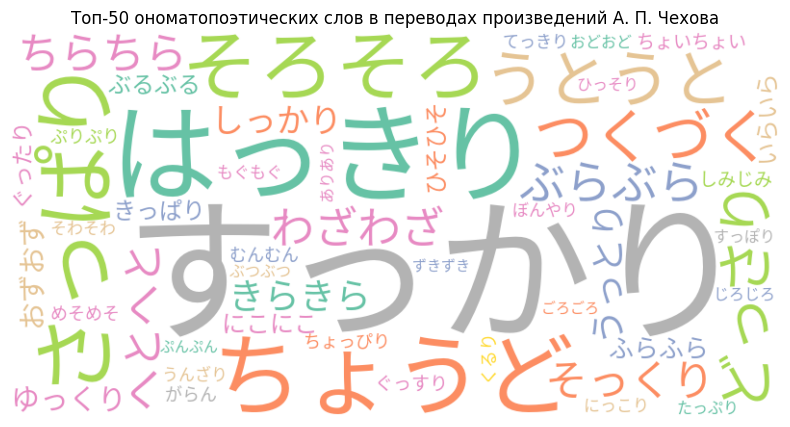

In [56]:
from wordcloud import WordCloud

# stoplist

top_50_words = [] # список кортежей [(слово, частота)]
for word, freq in word_counter_total.most_common(50):
    if word not in stoplist:
        top_50_words.append((word, freq))
# top_50_words = [(word, freq) for word, freq in word_counter_total.most_common(50) if word not in stoplist]

word_freq = {word: freq for word, freq in top_50_words} 
# word_freq — словарь, где ключ — слово, значение — частота
if word_freq:
    wordcloud = WordCloud(
    width=800,
    height=400,
    colormap='Set2',
    background_color='white',
    font_path=r'C:\Users\Екатерина\VS Code Projects\Проект 1\NotoSansCJKjp-Regular.otf' # fontproperties только для matplotlib
    ).generate_from_frequencies(word_freq)
else:
    print("Ошибка при построении облака.")

# Выводим облако слов на экран
plt.figure(figsize=(10,5)) # размер окна
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # без осей
plt.title("Топ-50 ономатопоэтических слов в переводах произведений А. П. Чехова")
plt.show()

**Круговая диаграмма №1.** Распределение частей речи среди ономатопов (janome).

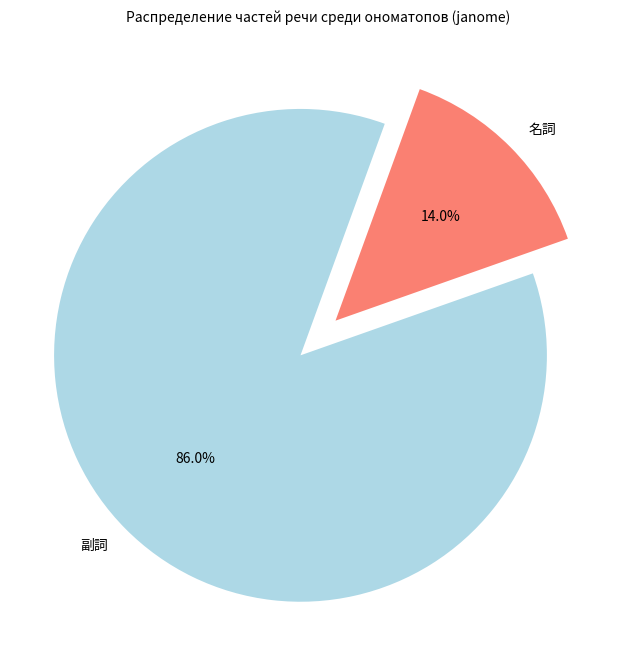

In [47]:
# Счётчик для частей речи
pos_counter_total = Counter()

for words in onomatopoeia_words_by_text.values(): # в значениях словаря ...words_by_text
    for word_pos in words:
        word, pos = word_pos.split(' (')
        pos = pos.strip(')')
        pos_counter_total[pos] += 1

colors = {'salmon', 'lightblue'}

# Строим круговую диаграмму
explode = [0.1] * len(pos_counter_total) # explode — это список, который раздвигает сегменты

plt.figure(figsize=(8, 8))
plt.pie(pos_counter_total.values(), labels=pos_counter_total.keys(), autopct='%1.1f%%',
        colors=colors, startangle=70, textprops={'fontproperties': prop}, explode=explode)
plt.title("Распределение частей речи среди ономатопов (janome)", fontproperties=prop)
plt.show()

*Выводы по третьей части:*

Результаты поиска ономатопоэтических слов в тексте отвечают поставленным задачам рассмотреть частотность ономатопов, однако ограниченный функционал частеречной разметки не позволяет выявить глаголы и прилагательные, а также порой ошибочно относит наречия к существительным.

В следующей части проекта мы постараемся более точно классифицировать части речи ономатопоэтических слов при помощи правил японской грамматики.

**ЧАСТЬ 4**

Повышаем точность классификации частей речи ономатопоэтических слов с помощью грамматических правил.

- **Глаголы и глагольные конструкции (adjective function):** частица *га* (опционально) + ядро + глагол с начальной формой *суру*.
- **Прилагательные (N-ADJ):** ядро + частица *но*, частица *ни*, суффикс *на* или глагольные частицы *да* | *дэсу*.
- **Наречия:** ядро + частицы *то* | *дэ*. С большой вероятностью всё остальное, что не подходит под условия выше.


Для исследования было важно использовать списки, а не множества, т.к. одна ономатопоэтическая единица могла появляться в одном тексте несколько раз и исполнять роль разных частей речи.

Нами было принято решение присоединить ономатопеи формата ядро + *сита* или *ситэиру* к глаголам, а не к прилагательным, исходя из особенностей анализа и работы с POS-разметкой, предоставляемой Janome. В данном случае, Janome разъединяет глагол *сита* на составляющие *си* и *та*, что осложняет поиск слов в определённых контекстах. На наш взгляд это значительно увеличивает сложность кода.

Поэтому, для упрощения обработки текстов в текущем проекте, было принято решение считать такие конструкции глагольными, так как они фактически представляют собой комбинацию глагола и прилагательного. Такой шаг позволяет более эффективно обрабатывать подобные формы, не слишком усложняя процесс разметки и поиска.

In [48]:
# import os
# from janome.tokenizer import Tokenizer

# save_directory
# onomatopoeia_list

# Функция для токенизации текста и фильтрации ономатопов
def tokenize_and_filter(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()

            tokenizer = Tokenizer()
            tokens = list(tokenizer.tokenize(text))

            filtered_tokens = []
            for i, token in enumerate(tokens):
                base_form = token.base_form
                part_of_speech = token.part_of_speech.split(',')[0] # только первый элемент (основная часть речи)

                if base_form in stoplist:
                    continue # пропускаем слово

                prev_token = tokens[i - 1] if i > 0 else None
                prev_surface = prev_token.surface if prev_token else ""
                next_token = tokens[i + 1] if i + 1 < len(tokens) else None
                next_surface = next_token.surface if next_token else ""
                next_base_form = next_token.base_form if next_token else ""

                if base_form in onomatopoeia_list and base_form not in stoplist and len(base_form) >= 3:
                    filtered_tokens.append((base_form, prev_surface, next_surface, next_base_form))
            
            return filtered_tokens
    
    except Exception as e:
        print(f"Ошибка ({file_path}): {e}")
        return []
    
# Функция классификации ономатопов по контексту
def classify_onomatopoeia(filtered_tokens):
    classified = {'VERB': [], 'ADV': [], 'N-ADJ': []} # глаголы, наречия, прилагательные

    for word, prev_surface, next_surface, next_base_form in filtered_tokens:
        if next_surface in ['の', 'な', 'に', 'だ', 'です']:
            classified['N-ADJ'].append(word)
        elif next_surface in ['と', 'で']:
            classified['ADV'].append(word)
        elif next_base_form == 'する':
            classified['VERB'].append(word)
        elif prev_surface == 'が' and next_base_form == 'する':
            classified['VERB'].append(word)
        else:
            classified['ADV'].append(word)

    return classified

# Обработка всех файлов
all_classified_words = {'VERB': [], 'ADV': [], 'N-ADJ': []}
count = 0
max_display = 5

for filename in os.listdir(save_directory):
    file_path = os.path.join(save_directory, filename)

    filtered_tokens = tokenize_and_filter(file_path)
    classified_onomatopoeia = classify_onomatopoeia(filtered_tokens)

    # Выводим первые пять произведений
    if count < max_display:
        print(f"Результаты для произведения {filename}:")
        for category, words in classified_onomatopoeia.items():
            if words:
                print(f"  {category.upper()}: {', '.join(words)}")
            else:
                print(f"  {category.upper()}: (не найдено)")
        
    elif count == max_display:
        print("И так далее…")
        
    for category, words in classified_onomatopoeia.items():
        all_classified_words[category].extend(words)

    count += 1

Результаты для произведения かき.txt:
  VERB: がくがく, ちらちら, へどもど, つるつる, がっしり, すべすべ, うとうと
  ADV: はっきり, ぐったり, ちょうど, てくてく, ぐったり, くっきり, ありあり, がくんと, しっとり, ぎらぎら, もぐもぐ, ぎらぎら, きゅうきゅう, がつがつ, ぎらぎら, ぶるぶる, ちょうど, がつがつ, ぎらぎら, がりがり
  N-ADJ: だぶだぶ, ぼろぼろ
Результаты для произведения かもめ.txt:
  VERB: べたべた, さばさば, どきどき, やきもき, ぷんぷん, うんざり, さっぱり, おどおど, じめじめ, ずきずき, きらきら, ちやほや, きらきら, はっきり, にこにこ, はっきり, うようよ, にっこり, うかうか, むしゃくしゃ, もやもや, くらくら, さっぱり, しっかり, くさくさ, うとうと, うっとり, すっきり, ぐずぐず, くらくら, うきうき, きりきり, ぽかぽか, ゆっくり, すっきり
  ADV: てくてく, ごろごろ, ザーッ, てっきり, べったり, やれやれ, きっかり, ちょうど, めそめそ, わいわい, めそめそ, むしゃくしゃ, むらむら, ずらり, むっつり, すっかり, ぞろい, やれやれ, そろそろ, さっぱり, どっさり, シーン, シーン, すっかり, すっかり, スーッ, ずるずる, キチン, ピヨピヨ, おちおち, おずおず, そっくり, さっぱり, つくづく, わいわい, すっかり, がらり, すっかり, はっきり, とっくり, ちょいちょい, ふらふら, しみじみ, ずんずん, はっきり, ちょうど, きっぱり, こっそり, たっぷり, あっさり, すっかり, へとへと, すっかり, ぶらぶら, きっぱり, ちょいちょい, ふらふら, すっかり, そろそろ, ちょっぴり, じっくり, すっかり, すっかり, おずおず, きっぱり, すっかり, わざわざ, きっかり, さっぱり, はっきり, そろそろ, こっそり, ちやほや, ぼつぼつ, カサカサ, コチコチ, すっかり
  N-ADJ: もじゃもじゃ, そっくり, めちゃめちゃ, ぱりぱり, ちょっぴり, 

**Круговая диаграмма №2.** Распределение частей речи среди ономатопов (правила).

Количество слов по категориям:
VERB: 355
ADV: 1069
N-ADJ: 95


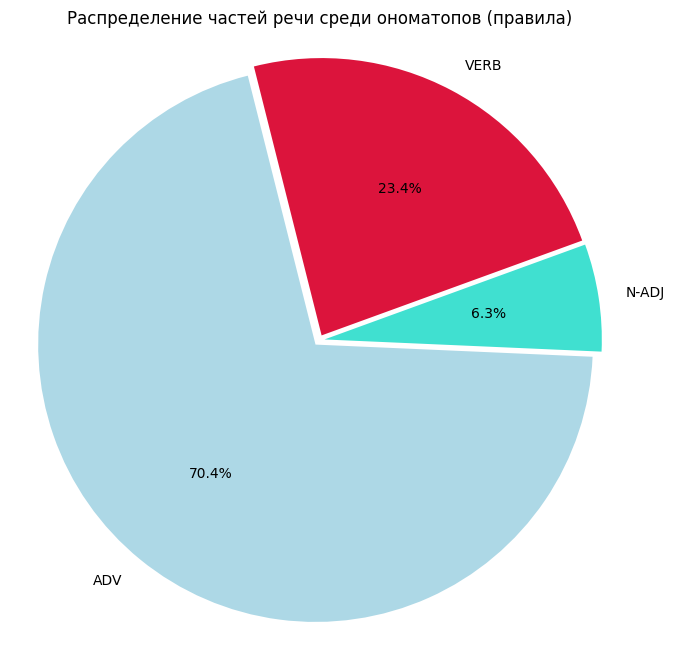

In [57]:
# Извлекаем пары ключ-значение из словаря all_classified_words, считаем, сколько в каждой категории слов
counts = {category: len(words) for category, words in all_classified_words.items()}

print("Количество слов по категориям:")
for category, count in counts.items():
    print(f'{category.upper()}: {count}')

# Строим круговую диаграмму
labels = list(counts.keys()) # список категорий (меток)
sizes = list(counts.values()) # список количества слов по категориям (размеры сегментов)

colors = ['crimson', 'lightblue', 'turquoise']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=20, 
        colors=colors, explode=[0.02] * len(labels))  
plt.title('Распределение частей речи среди ономатопов (правила)')
plt.axis('equal') 
plt.show()

**Таблица №2** и **облако слов №2.** Топ-20 частотных ономатопов среди наречий.

Топ-20 частотных ономатопов среди наречий


,Слово,Частотность,Перевод
0,すっかり,121,"/(adv,adv-to) (on-mim) all/completely/thorough..."
1,ちょうど,46,[ちょうど] /just/
2,さっぱり,37,"No, man, not really."
3,はっきり,33,...clear...
4,そろそろ,32,That was close.
5,やれやれ,22,/(int) oh!/ah!/oh dear!/good grief!/dear me!/d...
6,つくづく,19,Continue to
7,わざわざ,18,Just for that?
8,どっさり,17,A shitload.
9,ゆっくり,14,Slow


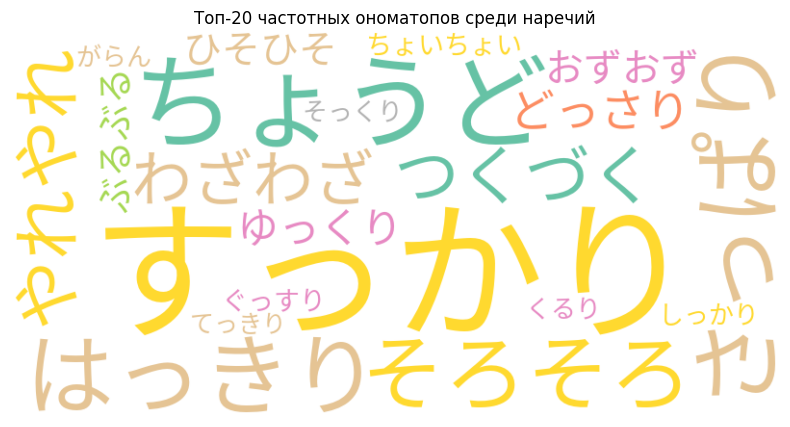

In [ ]:
# from deep_translator import GoogleTranslator
# from translate import Translator

# Функция для подсчета частотности слов
def get_top_words_table(classified_words, max_top=20):
    top_words_table = {}

    category = "ADV"
    words = classified_words.get(category, [])
    word_counter = Counter(words)  # подсчитываем частотность слов в категории
    
    top_words = word_counter.most_common(max_top)
    
    df = pd.DataFrame(top_words, columns=["Слово", "Частотность"])
    df["Перевод"] = df["Слово"].apply(translate_word) # та же функция перевода, что и выше

    top_words_table[category] = df
    
    return top_words_table

# Топ-20 ономатопов-наречий
top_words_table = get_top_words_table(all_classified_words, max_top=20)

df_adverbs = top_words_table.get("ADV", pd.DataFrame())

def plot_wordcloud(df, title):
    if not df.empty:
        print(title)
        display(df)

        wordcloud = WordCloud(
            font_path,
            width=800,
            height=400,
            background_color="white",
            colormap="Set2"
        ).generate_from_frequencies(dict(zip(df['Слово'], df['Частотность']))) # пара «слово» + «частотность» -> словарь

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(title)
        plt.show()

plot_wordcloud(df_adverbs, "Топ-20 частотных ономатопов среди наречий")


**Таблица №3** и **облако слов №3.** Топ-20 частотных ономатопов среди глаголов. 

Топ-20 частотных ономатопов среди глаголов


,Слово,Частотность,Перевод
0,うとうと,14,"/(adv,n,vs,adv-to) (on-mim) falling in a doze/..."
1,はっきり,13,...clear...
2,きらきら,11,"/(adv,adv-to,vs) (on-mim) glitter/sparkle/glis..."
3,ぶらぶら,11,"/(adj-na,adv,adv-to,vs) (1) (on-mim) dangling ..."
4,いらいら,11,irritable
5,にこにこ,10,"/(adv,adv-to,vs) (on-mim) with a friendly grin..."
6,ぷりぷり,10,"/(adv,n,vs) (1) (on-mim) angrily/in a huff/in ..."
7,ちらちら,9,"/(adv-to,vs) (1) (on-mim) falling lightly (e.g..."
8,うんざり,9,[うんざり] /bore (vs)/
9,うっとり,9,Smitten


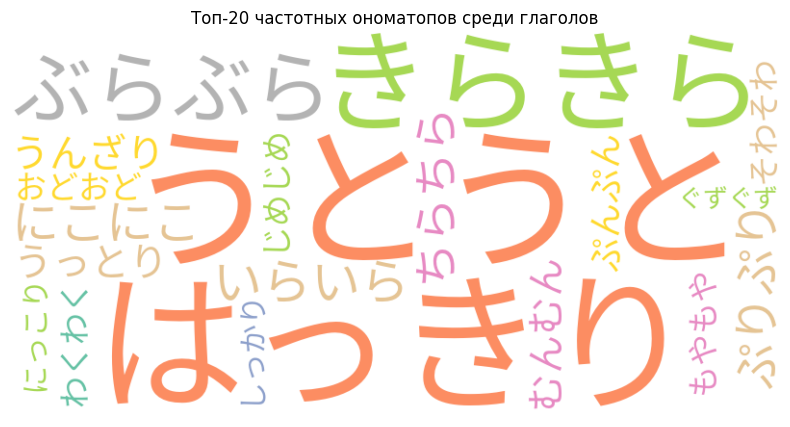

In [ ]:
# from deep_translator import GoogleTranslator
# from translate import Translator

def get_top_words_table(classified_words, max_top=20):
    top_words_table = {}

    category = "VERB"
    words = classified_words.get(category, [])
    word_counter = Counter(words)
    
    top_words = word_counter.most_common(max_top)

    df = pd.DataFrame(top_words, columns=["Слово", "Частотность"])
    df["Перевод"] = df["Слово"].apply(translate_word)

    top_words_table[category] = df
    
    return top_words_table

# Топ-20 ономатопов-глаголов
top_words_table = get_top_words_table(all_classified_words, max_top=20)

df_verbs = top_words_table.get("VERB", pd.DataFrame())

def plot_wordcloud(df, title):
    if not df.empty:
        print(title)
        display(df)

        wordcloud = WordCloud(
            font_path,
            width=800,
            height=400,
            background_color="white",
            colormap="Set2"
        ).generate_from_frequencies(dict(zip(df['Слово'], df['Частотность']))) 

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(title)
        plt.show()

plot_wordcloud(df_verbs, "Топ-20 частотных ономатопов среди глаголов")

**Таблица №4** и **облако слов №4.** Топ-20 частотных ономатопов среди прилагательных. 

Топ-20 частотных ономатопов среди прилагательных


,Слово,Частотность,Перевод
0,へとへと,16,"/(adj-na,n,adj-no) completely exhausted/dead t..."
1,そっくり,7,/(adv) (1) (on-mim) all/altogether/entirely/co...
2,だぶだぶ,5,"/(adj-na,adv,n,vs) (1) (on-mim) loose/baggy/(2..."
3,くたくた,5,"/(adj-na,adj-no) (1) (on-mim) exhausted/tired/..."
4,かさかさ,4,"/(adj-na,vs,adv,adv-to) (1) (on-mim) dry/bone ..."
5,たっぷり,4,so much.....
6,ぼろぼろ,3,"/(adj-na,adv,n,vs,adj-no) (1) (on-mim) worn-ou..."
7,ちょっぴり,3,/(adv) (on-mim) very little bit/just a smidgin...
8,ふらふら,3,"/(adj-na,adv-to,vs,adj-no) (1) (on-mim) unstea..."
9,よれよれ,3,"Ready, Ready, Ready"


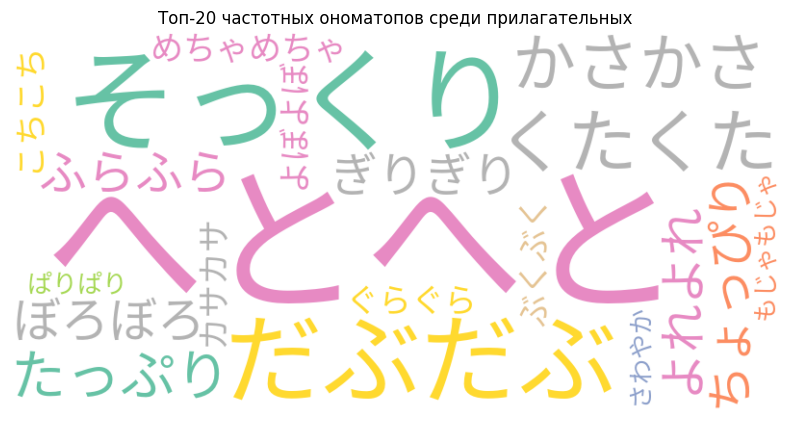

In [52]:
# from deep_translator import GoogleTranslator
# from translate import Translator

def get_top_words_table(classified_words, max_top=20):
    top_words_table = {}

    category = "N-ADJ"
    words = classified_words.get(category, [])
    word_counter = Counter(words) 
    
    top_words = word_counter.most_common(max_top)

    df = pd.DataFrame(top_words, columns=["Слово", "Частотность"])
    df["Перевод"] = df["Слово"].apply(translate_word)

    top_words_table[category] = df
    
    return top_words_table

# Топ-20 ономатопов-прилагательных
top_words_table = get_top_words_table(all_classified_words, max_top=20)

df_adjectives = top_words_table.get("N-ADJ", pd.DataFrame())

def plot_wordcloud(df, title):
    if not df.empty:
        print(title)
        display(df)

        wordcloud = WordCloud(
            font_path,
            width=800,
            height=400,
            background_color="white",
            colormap="Set2"
        ).generate_from_frequencies(dict(zip(df['Слово'], df['Частотность'])))

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(title)
        plt.show()

plot_wordcloud(df_adjectives, "Топ-20 частотных ономатопов среди прилагательных")


Таким образом, с помощью janome у нас получилось найти ономатопоэтические слова из созданного заранее списка, однако встроенной POS-разметки оказалось недостаточно, чтобы определить часть речи ономатопоэтической единицы в контексте.

Мы постарались вручную написать правила, позволяющие с большей точностью определять часть речи, и это значительно улучшило результаты. Теперь стало наглядно, какой процент занимают глаголы с глагольными выражениями, а какой — прилагательные. 

Ономатопея в японском языке чаще всего используется для описания звуков, движений или состояний, что естественным образом делает её наречием — с чем мы и janome оказались согласны.

Конечно, созданный нами алгоритм допускает ошибки. Несмотря на то что в рамках данного проекта нам не удалось отладить определение части речи до безупречности (в частности, мы столкнулись с задачей отсоединения глагольных выражений от глаголов), это может быть доработано в будущем. Также было бы интересно изучить, как со временем изменялось употребление ономатопоэтических слов в японском языке, а также рассмотреть труды японских исследователей о распределении частей речи среди ономатопов.

Спасибо за внимание!